In [10]:
import glob
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from torchvision.models import squeezenet1_1, mobilenet_v3_small, resnet50, densenet121
from torch.utils.data import TensorDataset, DataLoader
from preprocessing_pipeline import get_data

In [11]:
# TODO: Graph training accuracy vs time elapsed training

In [12]:
# set number of classes to 10 for baseline performance comparison
num_classes = 10
# 20 training epochs
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
train_data, test_data = get_data(num_classes=num_classes)

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

100%|██████████| 40000/40000 [05:51<00:00, 113.87it/s]


In [14]:
squeezenet_model = squeezenet1_1(weights='DEFAULT')
# redefine networks final classifier
squeezenet_model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=1)
squeezenet_model.num_classes = num_classes
# send to gpu
squeezenet_model = squeezenet_model.to(device)


squeeze_loss_fn = nn.CrossEntropyLoss()
squeeze_optimizer = torch.optim.Adam(params=squeezenet_model.parameters(), lr = 1e-5)

# initialize training loss
squeeze_training_loss = []

for epoch in range(num_epochs):
    start_time = time.time()
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = squeezenet_model(b_x)
        loss = squeeze_loss_fn(y_pred, b_y)
        
        squeeze_optimizer.zero_grad()
        loss.backward()
        squeeze_optimizer.step()

        
        if i % 5000 == 0:
            squeeze_training_loss.append(loss.item())
            print(f"Epoch: {epoch+1}/{num_epochs} --- Training Loss: {loss.item():.4f}")
            
squeeze_train_time = time.time() - start_time

Epoch: 1/20 --- Training Loss: 3.9867
Epoch: 2/20 --- Training Loss: 1.8000
Epoch: 3/20 --- Training Loss: 1.0892
Epoch: 4/20 --- Training Loss: 0.6827
Epoch: 5/20 --- Training Loss: 0.5208
Epoch: 6/20 --- Training Loss: 0.9301
Epoch: 7/20 --- Training Loss: 0.7004
Epoch: 8/20 --- Training Loss: 0.5717
Epoch: 9/20 --- Training Loss: 0.2552
Epoch: 10/20 --- Training Loss: 0.4330
Epoch: 11/20 --- Training Loss: 0.7180
Epoch: 12/20 --- Training Loss: 0.1473
Epoch: 13/20 --- Training Loss: 0.2595
Epoch: 14/20 --- Training Loss: 0.2201
Epoch: 15/20 --- Training Loss: 0.4313
Epoch: 16/20 --- Training Loss: 0.6736
Epoch: 17/20 --- Training Loss: 0.2349
Epoch: 18/20 --- Training Loss: 0.4172
Epoch: 19/20 --- Training Loss: 0.2338
Epoch: 20/20 --- Training Loss: 0.2604


In [15]:
mobilenet_model = mobilenet_v3_small(weights='DEFAULT')
# get number of in features from source
num_features = mobilenet_model.classifier[3].in_features
# redefine the networks final fully connected layer
mobilenet_model.classifier[3] = nn.Linear(num_features, num_classes)
# send to gpu
mobilenet_model = mobilenet_model.to(device)


mobile_loss_fn = nn.CrossEntropyLoss()
mobile_optimizer = torch.optim.Adam(params=mobilenet_model.parameters(), lr = 1e-4)

# initialize training loss
mobile_training_loss = []

for epoch in range(num_epochs):
    start_time = time.time()
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = mobilenet_model(b_x)
        loss = mobile_loss_fn(y_pred, b_y)
        
        mobile_optimizer.zero_grad()
        loss.backward()
        mobile_optimizer.step()
        
        if i % 5000 == 0:
            mobile_training_loss.append(loss.item())
            print(f"Epoch: {epoch+1}/{num_epochs} --- Training Loss: {loss.item():.4f}")
            
mobile_train_time = time.time() - start_time

Epoch: 1/20 --- Training Loss: 2.6769
Epoch: 2/20 --- Training Loss: 0.4237
Epoch: 3/20 --- Training Loss: 0.3703
Epoch: 4/20 --- Training Loss: 0.1676
Epoch: 5/20 --- Training Loss: 0.4628
Epoch: 6/20 --- Training Loss: 0.0872
Epoch: 7/20 --- Training Loss: 0.2038
Epoch: 8/20 --- Training Loss: 0.0970
Epoch: 9/20 --- Training Loss: 0.0763
Epoch: 10/20 --- Training Loss: 0.0235
Epoch: 11/20 --- Training Loss: 0.0356
Epoch: 12/20 --- Training Loss: 0.0415
Epoch: 13/20 --- Training Loss: 0.0164
Epoch: 14/20 --- Training Loss: 0.0065
Epoch: 15/20 --- Training Loss: 0.0015
Epoch: 16/20 --- Training Loss: 0.0049
Epoch: 17/20 --- Training Loss: 0.0116
Epoch: 18/20 --- Training Loss: 0.0137
Epoch: 19/20 --- Training Loss: 0.0003
Epoch: 20/20 --- Training Loss: 0.0617


In [16]:
resnet_model = resnet50(weights='DEFAULT')
# get number of in_features from source
num_features = resnet_model.fc.in_features
# redefine the networks final fully connected layer
resnet_model.fc = nn.Linear(num_features, num_classes)
# send to gpu
resnet_model = resnet_model.to(device)


res_loss_fn = nn.CrossEntropyLoss()
res_optimizer = torch.optim.Adam(params=resnet_model.parameters(), lr = 1e-5)

# initialize training loss
res_training_loss = []

for epoch in range(num_epochs):
    start_time = time.time()
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = resnet_model(b_x)
        loss = res_loss_fn(y_pred, b_y)
        
        res_optimizer.zero_grad()
        loss.backward()
        res_optimizer.step()
        
        if i % 5000 == 0:
            res_training_loss.append(loss.item())
            print(f"Epoch: {epoch+1}/{num_epochs} --- Training Loss: {loss.item():.4f}")
            
res_train_time = time.time() - start_time

Epoch: 1/20 --- Training Loss: 2.3592
Epoch: 2/20 --- Training Loss: 0.8607
Epoch: 3/20 --- Training Loss: 0.4986
Epoch: 4/20 --- Training Loss: 0.0289
Epoch: 5/20 --- Training Loss: 0.0449
Epoch: 6/20 --- Training Loss: 0.0352
Epoch: 7/20 --- Training Loss: 0.0332
Epoch: 8/20 --- Training Loss: 0.0174
Epoch: 9/20 --- Training Loss: 0.0095
Epoch: 10/20 --- Training Loss: 0.0362
Epoch: 11/20 --- Training Loss: 0.0145
Epoch: 12/20 --- Training Loss: 0.0052
Epoch: 13/20 --- Training Loss: 0.0057
Epoch: 14/20 --- Training Loss: 0.0039
Epoch: 15/20 --- Training Loss: 0.0046
Epoch: 16/20 --- Training Loss: 0.0252
Epoch: 17/20 --- Training Loss: 0.0006
Epoch: 18/20 --- Training Loss: 0.0259
Epoch: 19/20 --- Training Loss: 0.0056
Epoch: 20/20 --- Training Loss: 0.0055


In [17]:
densenet_model = densenet121(weights='DEFAULT')
# get number of in features from source
num_features = densenet_model.classifier.in_features
# redefine the networks final fully connected layer
densenet_model.classifier = nn.Linear(num_features, num_classes)
# send to gpu
densenet_model = densenet_model.to(device)


dense_loss_fn = nn.CrossEntropyLoss()
dense_optimizer = torch.optim.Adam(params=densenet_model.parameters(), lr = 1e-5)

# initialize training loss
dense_training_loss = []


for epoch in range(num_epochs):
    start_time = time.time()
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = densenet_model(b_x)
        loss = dense_loss_fn(y_pred, b_y)
        
        dense_optimizer.zero_grad()
        loss.backward()
        dense_optimizer.step()
        
        if i % 5000 == 0:
            dense_training_loss.append(loss.item())
            print(f"Epoch: {epoch+1}/{num_epochs} --- Training Loss: {loss.item():.4f}")
            
dense_train_time = time.time() - start_time

Epoch: 1/20 --- Training Loss: 2.6472
Epoch: 2/20 --- Training Loss: 0.7636
Epoch: 3/20 --- Training Loss: 0.2662
Epoch: 4/20 --- Training Loss: 0.1237
Epoch: 5/20 --- Training Loss: 0.1806
Epoch: 6/20 --- Training Loss: 0.0901
Epoch: 7/20 --- Training Loss: 0.0606
Epoch: 8/20 --- Training Loss: 0.0174
Epoch: 9/20 --- Training Loss: 0.0143
Epoch: 10/20 --- Training Loss: 0.0121
Epoch: 11/20 --- Training Loss: 0.0154
Epoch: 12/20 --- Training Loss: 0.0244
Epoch: 13/20 --- Training Loss: 0.0020
Epoch: 14/20 --- Training Loss: 0.0031
Epoch: 15/20 --- Training Loss: 0.0057
Epoch: 16/20 --- Training Loss: 0.0031
Epoch: 17/20 --- Training Loss: 0.0059
Epoch: 18/20 --- Training Loss: 0.0009
Epoch: 19/20 --- Training Loss: 0.0015
Epoch: 20/20 --- Training Loss: 0.0160


In [25]:
# custom accuracy computation, optionally displays predictions
def validate(model, data, display_pred = False):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.to(device)
        labels = labels.to(device)
        
        model.eval()
        x = model(images)
        value, pred = torch.max(x, 1)
        
        total += x.size(0)
        correct += torch.sum(pred == labels)
        
        if i % 1000 == 0 & display_pred == True:
            print(f"Pred: {x} / True: {labels}")
    return correct / total

In [22]:
def confusion_plot(model, data):
    y_true = []
    y_pred = []
    for i, (images, labels) in enumerate(data):

        model.eval()
        x = model(images)
        value, pred = torch.max(x, 1)
        
        y_pred += pred
        y_true += labels

    confusion_df = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                                index = [j for j in range(10)],
                                columns = [j for j in range(10)]
                               )
  
    plt.figure(figsize = (10,7))
    sns.heatmap(confusion_df, annot=True)
    plt.show()

In [28]:
print(f"SqueezeNet test accuracy: {validate(squeezenet_model.to(device), test_dataloader).item():.4f}")
print(f"MobileNetV3 test accuracy: {validate(mobilenet_model.to(device), test_dataloader).item():.4f}")
print(f"ResNet50 test accuracy: {validate(resnet_model.to(device), test_dataloader).item():.4f}")
print(f"DenseNet121 test accuracy: {validate(densenet_model.to(device), test_dataloader).item():.4f}")

SqueezeNet test accuracy: 0.9274
MobileNetV3 test accuracy: 0.9664
ResNet50 test accuracy: 0.9824
DenseNet121 test accuracy: 0.9860


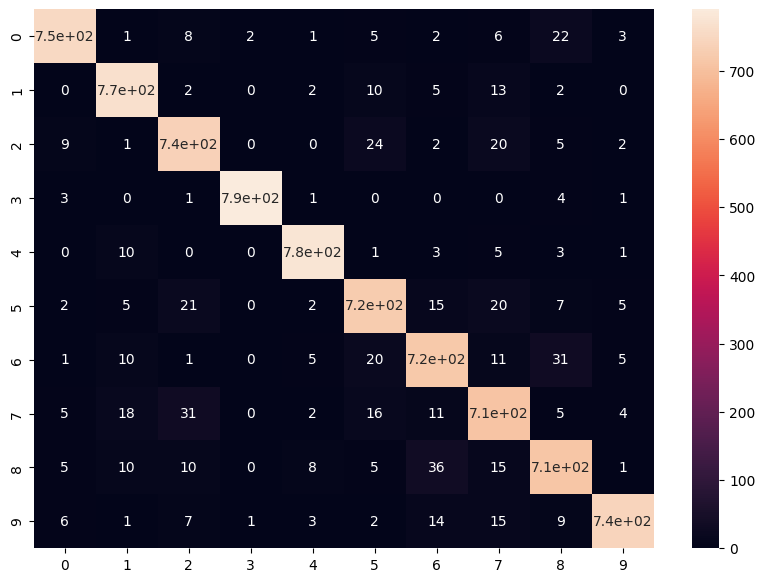

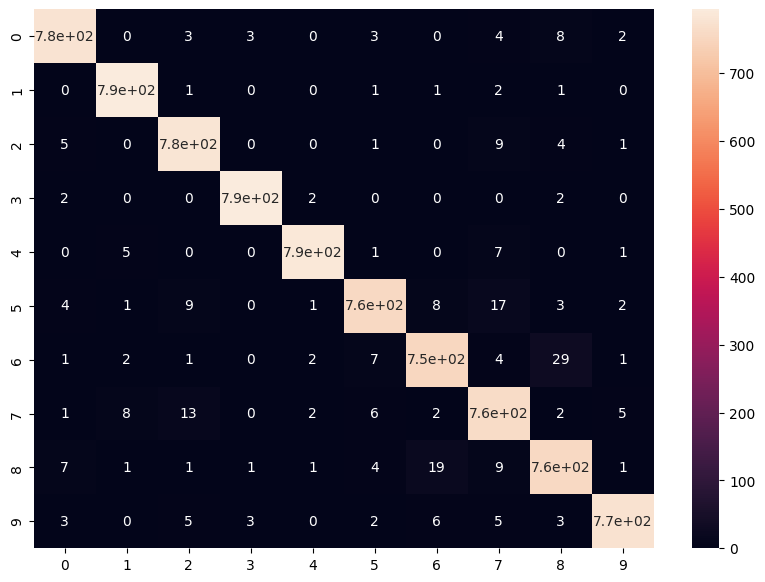

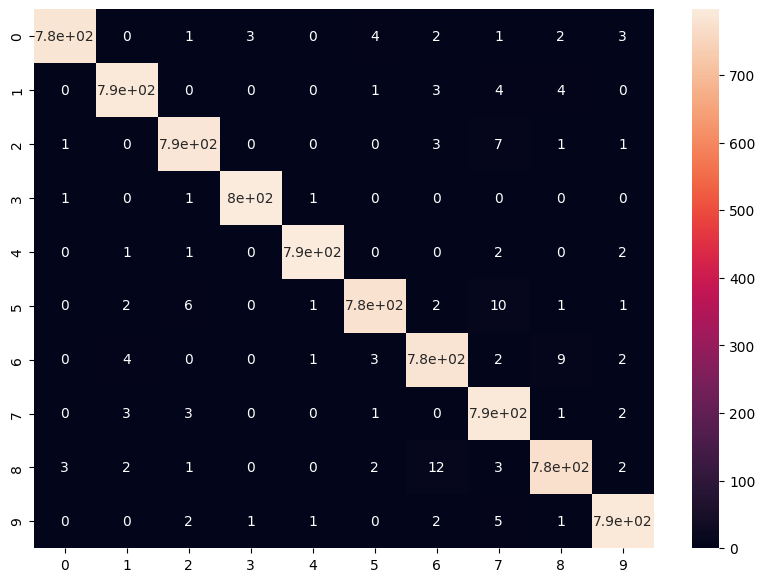

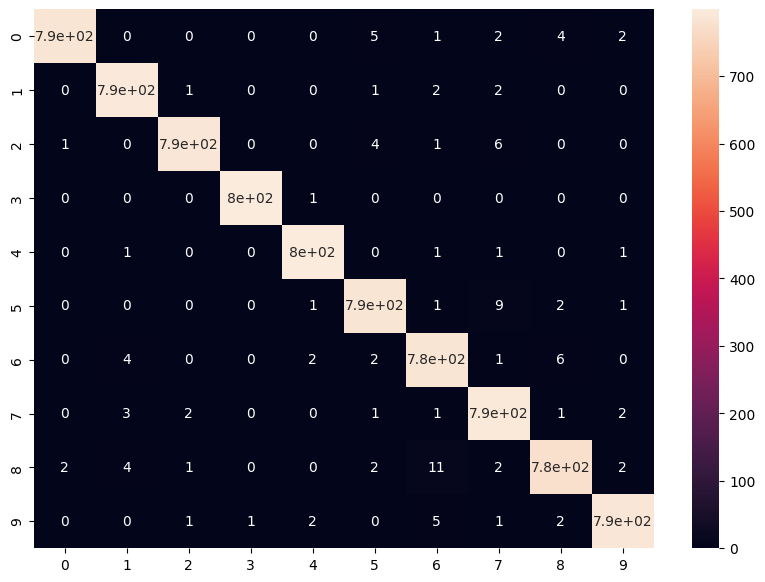

In [24]:
confusion_plot(squeezenet_model.to('cpu'), test_dataloader)
confusion_plot(mobilenet_model.to('cpu'), test_dataloader)
confusion_plot(resnet_model.to('cpu'), test_dataloader)
confusion_plot(densenet_model.to('cpu'), test_dataloader)

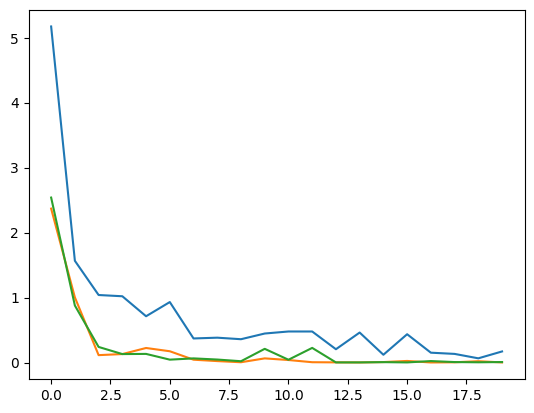

In [ ]:
# plt.plot(squeeze_training_loss)
# plt.plot(res_training_loss)
# plt.plot(dense_training_loss)